<a href="https://colab.research.google.com/github/BalkeesRekik/DS2002/blob/main/API_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import requests
import json
import pandas as pd

def get_stock_data(stock):
    apikey = "WFLPYCLI492lK2Txe3sj27blEm5bQe9fevJ4Wm20"
    url = "https://yfapi.net/v6/finance/quote"
    querystring = {"symbols": stock}
    headers = {
        'x-api-key': apikey
    }

    response = requests.get(url, headers=headers, params=querystring)

    if response.status_code == 200:
        stock_json = response.json()
        if stock_json['quoteResponse']['result']:
            return stock_json['quoteResponse']['result'][0]
        else:
            print(f"No data found for ticker {stock}. Please check the symbol.")
            return None
    else:
        print(f"Error: Unable to fetch data. Status code: {response.status_code}")
        return None

def get_trending_stocks():
    apikey = "WFLPYCLI492lK2Txe3sj27blEm5bQe9fevJ4Wm20"
    url = "https://yfapi.net/v1/finance/trending/US"

    headers = {
        'x-api-key': apikey
    }

    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        trending_json = response.json()
        return trending_json['finance']['result'][0]['quotes'][:5]  # Top 5 trending stocks
    else:
        print("Error fetching trending stocks")
        return []

def main():
    stock = input("Enter the stock ticker: ").upper()
    print(f"The Stock we will research is: {stock}")

    stock_info = get_stock_data(stock)

    if stock_info:
        long_name = stock_info.get('longName', 'N/A')
        market_price = stock_info.get('regularMarketPrice', 'N/A')
        target_mean_price = stock_info.get('targetMeanPrice', 'N/A')
        fifty_two_week_high = stock_info.get('fiftyTwoWeekHigh', 'N/A')
        fifty_two_week_low = stock_info.get('fiftyTwoWeekLow', 'N/A')

        print(f"{long_name} Price: ${market_price}")
        print(f"Target Mean Price: ${target_mean_price}")
        print(f"52 Week High: ${fifty_two_week_high}")
        print(f"52 Week Low: ${fifty_two_week_low}")

        data = {
            'Ticker': [stock],
            'Name': [long_name],
            'Market Price': [market_price],
            'Target Mean Price': [target_mean_price],
            '52 Week High': [fifty_two_week_high],
            '52 Week Low': [fifty_two_week_low]
        }

        df = pd.DataFrame(data)

        df.to_csv(f'{stock}_stock_data.csv', index=False)
        print(f"Data saved to {stock}_stock_data.csv")

    trending_stocks = get_trending_stocks()
    if trending_stocks:
        print("\nTop 5 Trending Stocks:")
        for i, trending in enumerate(trending_stocks):
            print(f"{i+1}. {trending['symbol']}")

if __name__ == "__main__":
    main()


Enter the stock ticker: AAPL
The Stock we will research is: AAPL
Apple Inc. Price: $227.725
Target Mean Price: $N/A
52 Week High: $237.23
52 Week Low: $164.08
Data saved to AAPL_stock_data.csv

Top 5 Trending Stocks:
1. NQ=F
2. ES=F
3. YM=F
4. AMSC
5. GC=F


Enter the stock ticker: AAPL


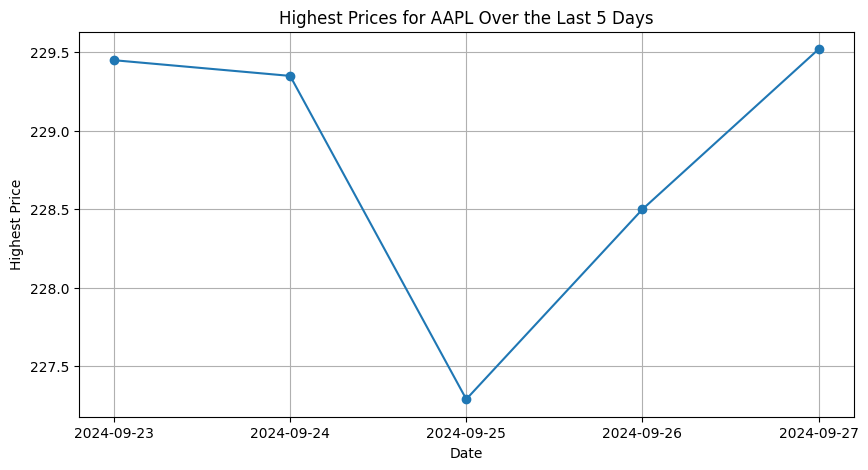

In [27]:
# BONUS

import requests
import matplotlib.pyplot as plt
from datetime import datetime

def get_historical_data(stock):
    apikey = "WFLPYCLI492lK2Txe3sj27blEm5bQe9fevJ4Wm20"
    url = f"https://yfapi.net/v8/finance/chart/{stock}"
    querystring = {"range": "5d", "interval": "1d"}
    headers = {
        'x-api-key': apikey
    }

    response = requests.get(url, headers=headers, params=querystring)

    if response.status_code == 200:
        chart_json = response.json()
        timestamps = chart_json['chart']['result'][0]['timestamp']
        high_prices = chart_json['chart']['result'][0]['indicators']['quote'][0]['high']

        dates = [datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d') for ts in timestamps]

        return dates, high_prices
    else:
        print(f"Error: Unable to fetch historical data. Status code: {response.status_code}")
        return [], []

def plot_historical_data(stock, dates, high_prices):
    plt.figure(figsize=(10, 5))
    plt.plot(dates, high_prices, marker='o')
    plt.title(f'Highest Prices for {stock} Over the Last 5 Days')
    plt.xlabel('Date')
    plt.ylabel('Highest Price')
    plt.grid(True)
    plt.show()

def main():
    stock = input("Enter the stock ticker: ").upper()

    dates, high_prices = get_historical_data(stock)
    if dates and high_prices:
        plot_historical_data(stock, dates, high_prices)

if __name__ == "__main__":
    main()
